In [1]:
import warnings 
warnings.filterwarnings('ignore') 

import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('PCOS_final.csv')
df.describe()

,Age (in Years),Weight (in Kg),Height (in Cm / Feet),Can you tell us your blood group ?,After how many months do you get your periods?\n(select 1- if every month/regular),Have you gained weight recently?,Do you have excessive body/facial hair growth ?,Are you noticing skin darkening recently?,Do have hair loss/hair thinning/baldness ?,Do you have pimples/acne on your face/jawline ?,Do you eat fast food regularly ?,Do you exercise on a regular basis ?,Scanty,Do you experience mood swings ?,Are your periods regular ?,"How long does your period last ? (in Days)\nexample- 1,2,3,4.....",Have you been diagnosed with PCOS/PCOD?
count,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000
mean,25.455914,59.286667,157.916473,13.262366,1.221505,0.501075,0.264516,0.337634,0.619355,0.412903,0.359140,0.286022,0.724731,0.761290,0.784946,4.600000,0.219355
std,8.099775,11.137046,14.933218,1.499994,0.541758,0.500537,0.441550,0.473412,0.486068,0.492886,0.480265,0.452386,0.447131,0.426754,0.411302,1.536622,0.414255
min,13.000000,33.000000,4.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,51.000000,154.000000,13.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,0.000000
50%,22.000000,58.000000,160.000000,13.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,5.000000,0.000000
75%,28.000000,65.000000,164.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,0.000000
max,58.000000,100.000000,186.000000,16.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 17 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Age (in Years)                                                                     465 non-null    int64  
 1   Weight (in Kg)                                                                     465 non-null    float64
 2   Height (in Cm / Feet)                                                              465 non-null    float64
 3   Can you tell us your blood group ?                                                 465 non-null    int64  
 4   After how many months do you get your periods?
(select 1- if every month/regular)  465 non-null    int64  
 5   Have you gained weight recently?                                                   465 non-null    int64  

In [4]:
df = df.drop(['Scanty'], axis=1)

In [5]:
df.shape


(465, 16)

In [6]:

for col in df.columns[0:]:
    print(df[col].unique())
    


[21 17 28 45 16 20 40 38 34 27 18 22 42 26 41 35 24 46 44 52 29 31 39 30
 47 43 25 36 33 19 23 37 58 15 54 14 50 32 51 48 13]
[ 47.   45.   37.   54.   40.   70.   48.   55.   68.   62.   58.   64.
  42.   60.   52.   67.   75.   63.   53.   65.   49.   69.   57.   56.
  55.5  87.   89.   81.   59.   73.   44.   50.   71.   90.   66.   43.
  46.   68.5  85.   86.   39.   51.   72.   61.   78.   76.   33.   83.
  82.   41.   49.8  74.   65.5  80.   54.5 100.   36.   53.5  84.   77.
  88.   35. ]
[168.   156.   162.   160.   150.   167.   147.   152.   157.   153.
 161.   154.   164.   176.   165.   155.   172.   158.   186.   166.
 170.   140.   159.   163.   151.   175.   183.   145.   142.   144.
 169.    51.   149.   173.   171.   146.    13.46 143.   148.     4.
   4.7  174.  ]
[13 11 15 12 14 16]
[1 2 3]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[1 0]
[ 6  4  7  5  1  2  3  0  8 10 15 14]
[0 1]


In [7]:
df['Have you been diagnosed with PCOS/PCOD?'].value_counts()

Have you been diagnosed with PCOS/PCOD?
0    363
1    102
Name: count, dtype: int64

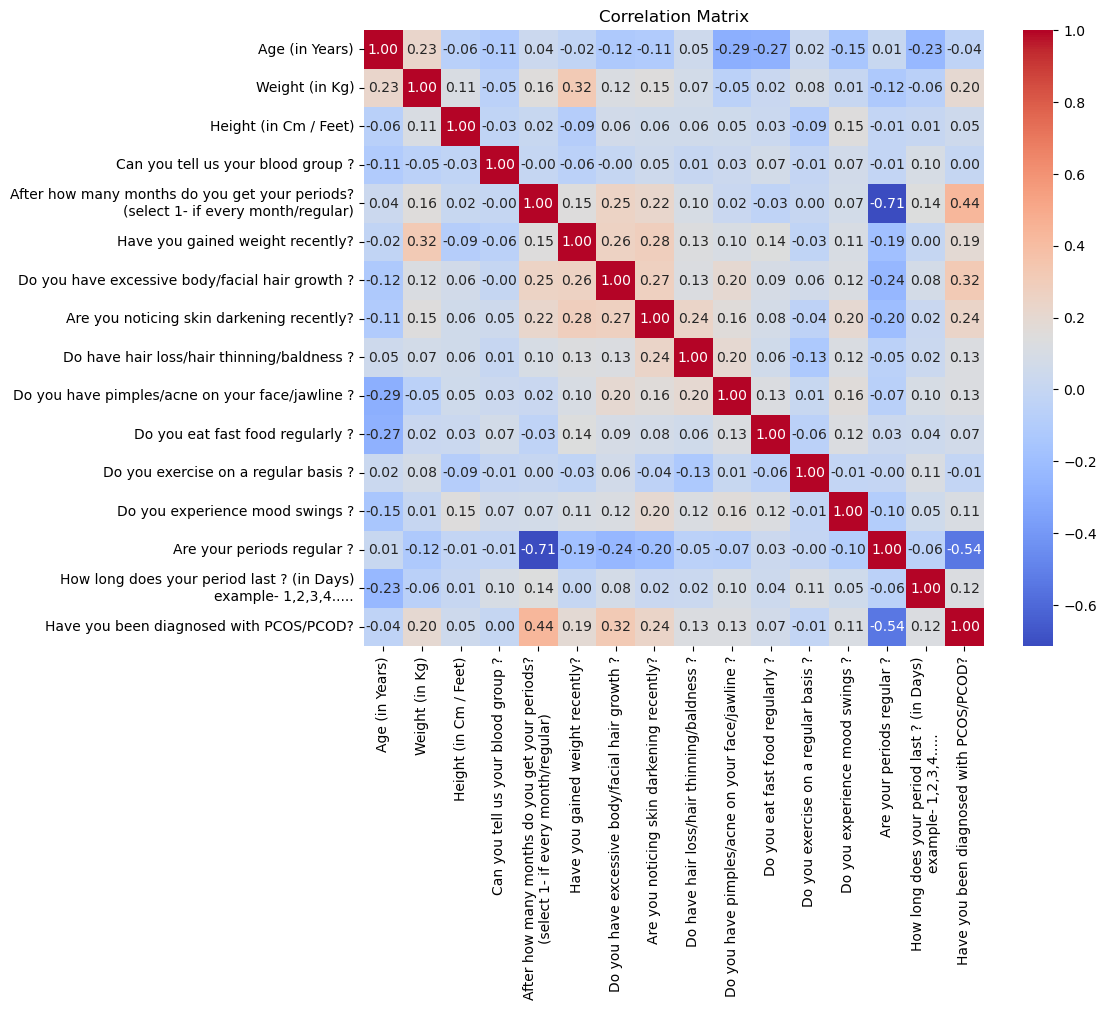

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'Osteoporosis' is your target column
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [18]:
# Assuming df is your DataFrame and 'Osteoporosis' is your target column
X = df.drop(['Have you been diagnosed with PCOS/PCOD?'], axis=1)  # Exclude 'Id' column
y = df['Have you been diagnosed with PCOS/PCOD?']

In [19]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
# Define the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Classifier": SVC(),
    "KNN": KNeighborsClassifier()
}

In [21]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{name} Accuracy: {score * 100:.2f}%")

Logistic Regression Accuracy: 88.17%
Decision Tree Accuracy: 73.12%
Support Vector Classifier Accuracy: 81.72%
KNN Accuracy: 79.57%


In [15]:
from sklearn.metrics import confusion_matrix
model = LogisticRegression()
model.fit(X_train, y_train)
print(model)
# Predict on the Test Data
y_pred = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

LogisticRegression()


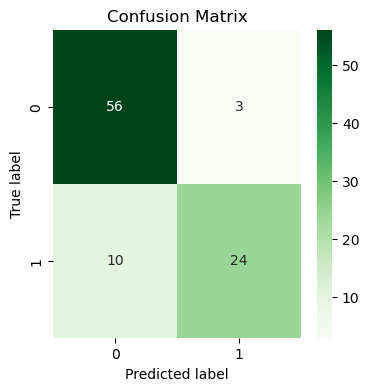

In [16]:
# Create a Confusion Matrix
cm = np.array([[56, 3], [10, 24]])
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [16]:
input_data = (45,40,150,13,2,0,0,0,1,0,0,0,1,0,7)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a PCOS')
else:
  print('The Person has PCOS')

[0]
The Person does not have a PCOS


In [ ]:
import pickle

In [ ]:
filename = "../savedModels/Pcos.sav"

In [ ]:
pickle.dump(model, open(filename,'wb'))

In [ ]:
loaded_model = pickle.load(open(filename,'rb'))

In [ ]:
input_data = (45,40,150,13,2,0,0,0,1,0,0,0,1,0,7)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a PCOS')
else:
  print('The Person has PCOS')